In [28]:
from sys import stdout

%matplotlib inline
import matplotlib.pyplot as plt
import mdtraj
import nglview
import numpy as np
import pandas as pd

from openmm import *
from openmm.app import *
from openmm.unit import *
from openmm.app import PDBFile

import mdtraj as md

def optimised_dist(coord_1, coords, box_size):
    delta_x = abs(coord_1[0]-coords[:,0])
    delta_x = np.minimum(delta_x, box_size-delta_x)

    delta_y = abs(coord_1[1]-coords[:,1])
    delta_y = np.minimum(delta_y, box_size-delta_y)

    delta_z = abs(coord_1[2]-coords[:,2])
    delta_z = np.minimum(delta_z, box_size-delta_z)

    return np.sqrt(delta_x**2+delta_y**2+delta_z**2)


def p_dist(coord_1, coord_2, box_size):
    x = min(box_size-abs(coord_1[0]-coord_2[0]), abs(coord_1[0]-coord_2[0]))
    y = min(box_size-abs(coord_1[1]-coord_2[1]), abs(coord_1[1]-coord_2[1]))
    z = min(box_size-abs(coord_1[2]-coord_2[2]), abs(coord_1[2]-coord_2[2]))
    '''
    if abs(coord_1[0]-coord_2[0]) > 0.5*box_size:
        x = box_size-abs(coord_1[0]-coord_2[0])
    else:
        x = abs(coord_1[0]-coord_2[0]) 

    if abs(coord_1[1]-coord_2[1]) > 0.5*box_size:
        y = box_size-abs(coord_1[1]-coord_2[1])
    else:
        y = abs(coord_1[1]-coord_2[1]) 

    if abs(coord_1[1]-coord_2[1]) > 0.5*box_size:
        z = box_size-abs(coord_1[1]-coord_2[1])
    else:
        z = abs(coord_1[1]-coord_2[1]) 
    
'''
    return np.sqrt((x**2+y**2+z**2))

print(p_dist([1.964,2.832,2.88 ], [0.51600003,0.075,     2.802     ], 3.0))
x = np.array([[0.51600003,0.075,     2.802     ], ])
print(optimised_dist(np.array([1.964,2.832,2.88 ]), x, 3.0))

1.4703186433967301
[1.47031864]


In [17]:
x = np.array([[1.964,2.832,2.88 ],[0.51600003,0.075,2.802], [4,5,2.453]])
y = np.array([1.964,2.832,2.88 ])
z = np.array([0.51600003,0.075,2.802])
print(np.minimum(y,z))

[0.51600003 0.075      2.802     ]


In [3]:
SIZE=3.0

forcefield = ForceField('tip3p.xml')

topology = Topology()
positions = []

modeller = Modeller(topology, positions)

modeller.addSolvent(forcefield,
                    boxSize=Vec3(SIZE, SIZE, SIZE)*nanometer,
                    model='tip3p')

with open('top_rdf.pdb', 'w') as f:
    PDBFile.writeFile(modeller.topology, modeller.positions, f)

In [4]:
system = forcefield.createSystem(modeller.topology,
                                 nonbondedMethod=PME,
                                 nonbondedCutoff=1.0*nanometer,
                                 constraints=HBonds)

integrator = LangevinIntegrator(
    300, #Temp (Kelvin)
    1, #Friction Coefficient (1/picoseconds)
    0.002 #Step Increment (picoseconds)
)

simulation = Simulation(modeller.topology, system, integrator)
simulation.context.setPositions(modeller.positions)

print('Minimizing...')
simulation.minimizeEnergy()

print('Simulating...')
simulation.reporters.append(XTCReporter('trajectory_rdf.xtc', 100))
simulation.reporters.append(StateDataReporter(stdout, 10000, step=True, potentialEnergy=True, temperature=True))

simulation.step(50000)

Minimizing...
Simulating...
#"Step","Potential Energy (kJ/mole)","Temperature (K)"
10000,-35353.92090284487,308.45648850611457
20000,-35615.25684034487,308.59911531074863
30000,-35373.45801221987,304.89254077619904
40000,-35512.55371534487,294.8788318441258
50000,-35423.42090284487,297.1299019351625


In [18]:
t = md.load('trajectory_rdf.xtc', top='top_rdf.pdb')

In [19]:
frame = t[-1]
top = frame.topology

oxygens = [atom.index for atom in top.atoms if atom.element.symbol == 'O']
print(oxygens)

oxygen_pairs = []
for i in oxygens:
    for j in oxygens:
        if j>i:
            oxygen_pairs.append([i,j])

[0, 3, 6, 9, 12, 15, 18, 21, 24, 27, 30, 33, 36, 39, 42, 45, 48, 51, 54, 57, 60, 63, 66, 69, 72, 75, 78, 81, 84, 87, 90, 93, 96, 99, 102, 105, 108, 111, 114, 117, 120, 123, 126, 129, 132, 135, 138, 141, 144, 147, 150, 153, 156, 159, 162, 165, 168, 171, 174, 177, 180, 183, 186, 189, 192, 195, 198, 201, 204, 207, 210, 213, 216, 219, 222, 225, 228, 231, 234, 237, 240, 243, 246, 249, 252, 255, 258, 261, 264, 267, 270, 273, 276, 279, 282, 285, 288, 291, 294, 297, 300, 303, 306, 309, 312, 315, 318, 321, 324, 327, 330, 333, 336, 339, 342, 345, 348, 351, 354, 357, 360, 363, 366, 369, 372, 375, 378, 381, 384, 387, 390, 393, 396, 399, 402, 405, 408, 411, 414, 417, 420, 423, 426, 429, 432, 435, 438, 441, 444, 447, 450, 453, 456, 459, 462, 465, 468, 471, 474, 477, 480, 483, 486, 489, 492, 495, 498, 501, 504, 507, 510, 513, 516, 519, 522, 525, 528, 531, 534, 537, 540, 543, 546, 549, 552, 555, 558, 561, 564, 567, 570, 573, 576, 579, 582, 585, 588, 591, 594, 597, 600, 603, 606, 609, 612, 615, 618, 62

1937.1291094620442
0.7748516437848176
0.9896908625186204


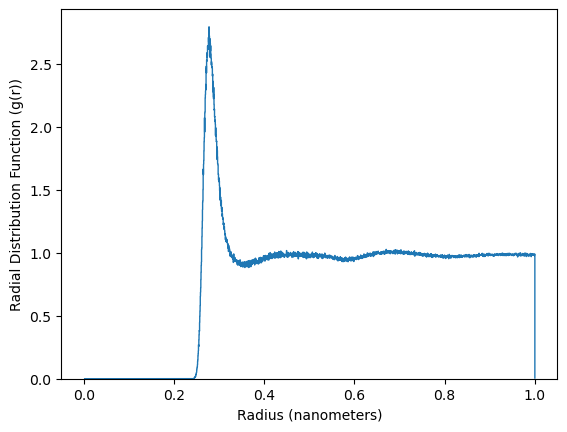

In [29]:
num_bins = 2500
radii = [(1/num_bins)*i for i in range(1, num_bins+1)]
#print(radii)
counts = [0 for _ in range(num_bins)]
#pairs = []

oxygens = [atom.index for atom in t[0].topology.atoms if atom.element.symbol == 'O']

for frame in t:
    top = frame.topology
    oxygen_coords = frame.xyz[0][oxygens]

    for i in range(len(oxygens)):
       #dists = optimised_dist(oxygen_coords[i]%3, oxygen_coords[range(i+1, len(oxygens))]%3, 3.0)
       #dists = [dist for dist in dists if dist <= 1]
       #for dist in dists:
       #    total += 1
       #    counts[int(dist//radii[0])] += 1

        dists = optimised_dist(oxygen_coords[i]%3, oxygen_coords[range(len(oxygens))]%3, 3.0)
        for dist in dists:
            if dist < 1 and dist != 0:
                counts[int(dist//radii[0])] += 1

#print(counts)
rdf = [(counts[i] / ((4/3)*np.pi* (radii[i]+radii[0]) **3 - (4/3)*np.pi*radii[i]**3))/500/887/33.45 for i in range(num_bins)]
print(sum(rdf))
#rdf = [element/sum(rdf)*num_bins for element in rdf]
print(sum(rdf)/len(rdf))
print(rdf[-1])
edges = radii
edges.insert(0, 0)
#print(edges)
plot = plt.stairs(rdf, edges)
plt.xlabel('Radius (nanometers)')
plt.ylabel('Radial Distribution Function (g(r))')
plt.show(plot)

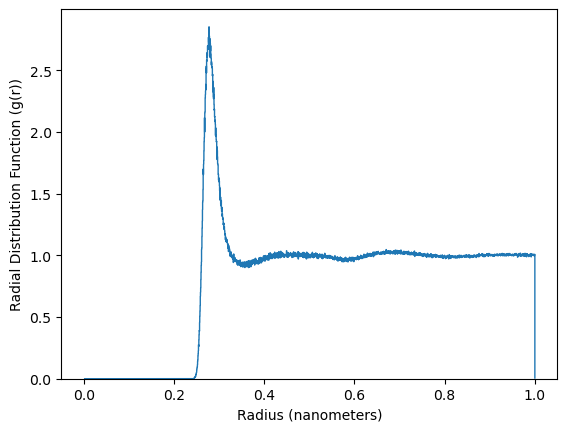

In [30]:
%matplotlib inline
built_in_rdf = md.compute_rdf(t[[i for i in range(len(t))]], oxygen_pairs, n_bins=2500)

edges = [i-built_in_rdf[0][0] for i in built_in_rdf[0]]
edges.append(built_in_rdf[0][-1]+built_in_rdf[0][0])
plot = plt.stairs(built_in_rdf[1], edges)
plt.xlabel('Radius (nanometers)')
plt.ylabel('Radial Distribution Function (g(r))')
plt.show(block=True)

In [55]:
len(oxygen_pairs)

392941

In [32]:
atoms = list(t[0].topology.atoms)
OH_pairs = []
for i in range(len(atoms)):
    for j in range(i+1, len(atoms)):
        if [atoms[i].element.symbol, atoms[j].element.symbol]==['O', 'H']:
            OH_pairs.append([i,j])

In [33]:
built_in_rdf_OH = md.compute_rdf(t[[i for i in range(len(t))]], OH_pairs, n_bins=2500)

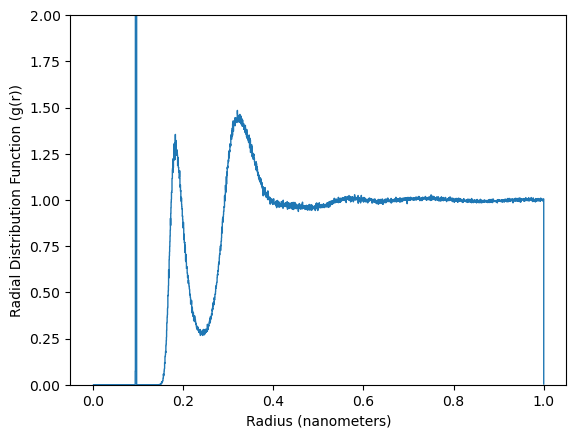

In [35]:
edges = [i-built_in_rdf_OH[0][0] for i in built_in_rdf_OH[0]]
edges.append(built_in_rdf_OH[0][-1]+built_in_rdf_OH[0][0])
plt.ylim(0,2)
plot = plt.stairs(built_in_rdf_OH[1], edges)
plt.xlabel('Radius (nanometers)')
plt.ylabel('Radial Distribution Function (g(r))')
plt.ion()
plt.show()

In [ ]:
#y_lim = 0

for start in range(len(t)-50):
    built_in_rdf = mdtraj.compute_rdf(t[[i for i in range(start, 50+start)]], oxygen_pairs, n_bins=250)
    
    edges = [i-built_in_rdf[0][0] for i in built_in_rdf[0]]
    edges.append(built_in_rdf[0][-1]+built_in_rdf[0][0])
    plot = plt.stairs(built_in_rdf[1], edges)
    #if start == 0:
    #    y_lim = max(built_in_rdf[1])*1.1
    plt.ylim(0,3.8)
    #plt.ylim(0, y_lim)
    plt.title(f'Temp: 300K, Frames: {start+1}-{start+10}')
    plt.xlabel('Radius (nanometers)')
    plt.ylabel('Radial Distribution Function (g(r))')
    #plt.show(plot)
    plt.savefig(f'Plots_GIF/plot{start+1}.png')
    plt.close()

In [10]:
import glob
from PIL import Image

images = [Image.open(f'Plots_GIF/plot{i}.png') for i in range(1,451)]
image_one = images[0]
image_one.save('RDF(250K).gif', format='GIF', append_images=images, save_all=True, duration=50, loop=0)

In [ ]:
for temp, colour in [[250, 'blue'], [300, 'green'], [350, 'red'], [400, 'magenta'], [500, 'black']]:
    SIZE=3.0

    forcefield = ForceField('tip3p.xml')

    topology = Topology()
    positions = []

    modeller = Modeller(topology, positions)

    modeller.addSolvent(forcefield,
                        boxSize=Vec3(SIZE, SIZE, SIZE)*nanometer,
                        model='tip3p')

    with open('top.pdb', 'w') as f:
        PDBFile.writeFile(modeller.topology, modeller.positions, f)
    
    integrator = LangevinIntegrator(
        temp, #Temp (Kelvin)
        1, #Friction Coefficient (1/picoseconds)
        0.002 #Step Increment (picoseconds)
    )

    simulation = Simulation(modeller.topology, system, integrator)
    simulation.context.setPositions(modeller.positions)

    print('Minimizing...')
    simulation.minimizeEnergy()

    print('Simulating...')
    simulation.reporters.append(XTCReporter('trajectory.xtc', 100))
    simulation.reporters.append(StateDataReporter(stdout, 10000, step=True, potentialEnergy=True, temperature=True))

    simulation.step(50000)
    
    t = md.load('trajectory.xtc', top='top.pdb')

    for start in range(len(t)-50):
        built_in_rdf = mdtraj.compute_rdf(t[[i for i in range(start, 50+start)]], oxygen_pairs, n_bins=250)
        
        edges = [i-built_in_rdf[0][0] for i in built_in_rdf[0]]
        edges.append(built_in_rdf[0][-1]+built_in_rdf[0][0])
        plot = plt.stairs(built_in_rdf[1], edges, color=colour)
        #if start == 0:
        #    y_lim = max(built_in_rdf[1])*1.1
        plt.ylim(0,3.8)
        #plt.ylim(0, y_lim)
        plt.title(f'Temp: {temp}K, Frames: {start+1}-{start+10}')
        plt.xlabel('Radius (nanometers)')
        plt.ylabel('Radial Distribution Function (g(r))')
        #plt.show(plot)
        plt.savefig(f'Plots_GIF/plot{start+1}.png')
        plt.close()
    
    images = [Image.open(f'Plots_GIF/plot{i}.png') for i in range(1,451)]
    image_one = images[0]
    image_one.save(f'RDF({temp}K).gif', format='GIF', append_images=images, save_all=True, duration=50, loop=0)

Minimizing...
Simulating...
#"Step","Potential Energy (kJ/mole)","Temperature (K)"
10000,-38077.66699659487,249.34455648810294
20000,-37638.76465284487,258.7185315361301
30000,-37866.02539503237,249.03894339379494
40000,-37681.96191846987,246.56458142344877
50000,-37764.44824659487,253.12055642500115
Minimizing...
Simulating...
#"Step","Potential Energy (kJ/mole)","Temperature (K)"
10000,-35555.21094190737,292.2217644733241
20000,-35311.08105909487,292.39890524229367
30000,-35296.82715284487,291.5569897475913
40000,-35478.56445753237,299.6704432728237
50000,-35571.13574659487,297.19133370021774
Minimizing...
Simulating...
#"Step","Potential Energy (kJ/mole)","Temperature (K)"
10000,-33363.24609815737,354.17099609304364
20000,-33633.43945753237,358.18967579196817
30000,-33555.60742628237,338.56149815506797
40000,-33697.69141065737,349.9654154381781
50000,-33716.18555128237,349.0460367400918
Minimizing...
Simulating...
#"Step","Potential Energy (kJ/mole)","Temperature (K)"
10000,-31730.2